In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [702]:
train_data=pd.read_csv("C:\\Users\\Manish Gaikwad\\Downloads\\train.csv")
test_data=pd.read_csv("C:\\Users\\Manish Gaikwad\\Downloads\\test.csv")

In [703]:
df=pd.concat([train_data,test_data])

In [704]:
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [705]:
df.tail()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0
504,3,2.0,1301.0,sqft,3000.00,sqft,98103,895000.0


In [706]:
df.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 177.3+ KB


In [708]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2521.000000,2521.000000,2521.000000,2097.000000,2521.000000,2.521000e+03
mean,2.877033,2.171956,1758.998017,3896.245794,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,2714.651578,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,1263.000000,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,4001.000000,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,6000.000000,98126.000000,1.115000e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [709]:
df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          424
lot_size_units    424
zip_code            0
price               0
dtype: int64

In [710]:
df.nunique()

beds                11
baths               16
size              1013
size_units           1
lot_size          1134
lot_size_units       2
zip_code            29
price              876
dtype: int64

In [711]:
df['lot_size_units'].value_counts()

sqft    1818
acre     279
Name: lot_size_units, dtype: int64

In [712]:
#some variables are in acre instead of sqft. 
print ("size units\n",df["size_units"].value_counts(),'\n')
print ("lot size units\n",df["lot_size_units"].value_counts())

size units
 sqft    2521
Name: size_units, dtype: int64 

lot size units
 sqft    1818
acre     279
Name: lot_size_units, dtype: int64


In [713]:
#convert observation in acres to sqft - lot_size column
# Define a function to convert lot_size to sqft
def sq_ft(lot):
    if lot['lot_size_units'] == 'acre':
        return lot['lot_size'] * 43560
    else:
        return lot['lot_size']

In [714]:
# Apply the function -- sqft -- to the lot_size column and create a new column

df['lot_size_sqft'] = df.apply(sq_ft, axis=1)

In [715]:
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,6000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,13503.6
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,3783.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,5175.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,NaN


In [716]:
df['lot_size_sqft']

0       6000.0
1      13503.6
2       3783.0
3       5175.0
4          NaN
        ...   
500    13068.0
501     1570.0
502    20473.2
503     4887.0
504     3000.0
Name: lot_size_sqft, Length: 2521, dtype: float64

In [717]:
df.lot_size_sqft.isnull().sum()

424

## Handling null value using simple imputer

In [718]:
from sklearn.impute import SimpleImputer

In [719]:
imputer_cols=['lot_size_sqft']
imputer = SimpleImputer(strategy='median')
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])

In [720]:
df.lot_size_sqft.isnull().sum()

0

In [721]:
#Check number of unique values
df["zip_code"].nunique()

29

In [722]:
#zip code issues to check datatype
df["zip_code"].dtypes

dtype('int64')

In [723]:
#convert zip_code to a categorical variable in a new column
df["zip_cat"] = df["zip_code"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2521 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            2521 non-null   int64   
 1   baths           2521 non-null   float64 
 2   size            2521 non-null   float64 
 3   size_units      2521 non-null   object  
 4   lot_size        2097 non-null   float64 
 5   lot_size_units  2097 non-null   object  
 6   zip_code        2521 non-null   int64   
 7   price           2521 non-null   float64 
 8   lot_size_sqft   2521 non-null   float64 
 9   zip_cat         2521 non-null   category
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 200.7+ KB


In [724]:
mean_by_zip_code = df.groupby('zip_cat')['price'].mean().sort_values(ascending= False)
print(mean_by_zip_code.shape)
mean_by_zip_code.head(10)

(29,)


zip_cat
98105    1.852051e+06
98112    1.665909e+06
98177    1.295369e+06
98199    1.231790e+06
98102    1.222570e+06
98119    1.074703e+06
98115    1.017842e+06
98136    1.017331e+06
98117    1.000516e+06
98109    9.789456e+05
Name: price, dtype: float64

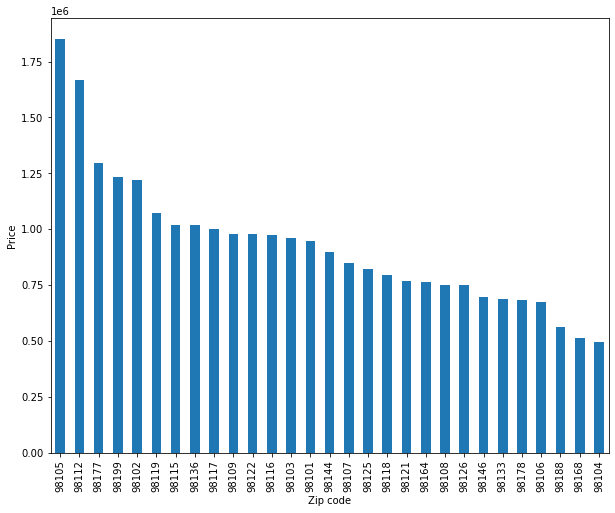

In [725]:
plt.figure(figsize=(10, 8))
mean_by_zip_code.plot.bar()
plt.xlabel('Zip code')
plt.ylabel('Price')
plt.show()

##  TO CHECK OUTLIER IN DATA

Text(0, 0.5, 'size')

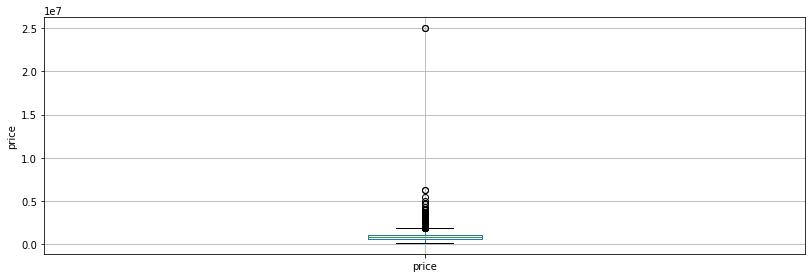

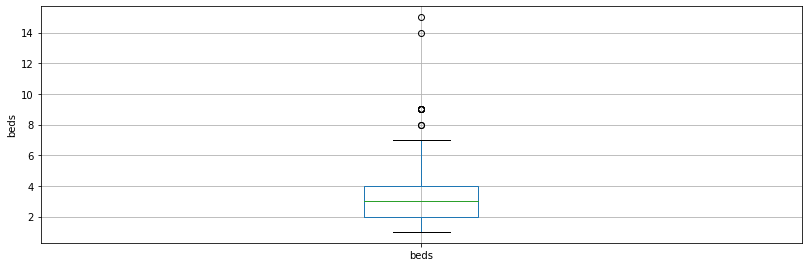

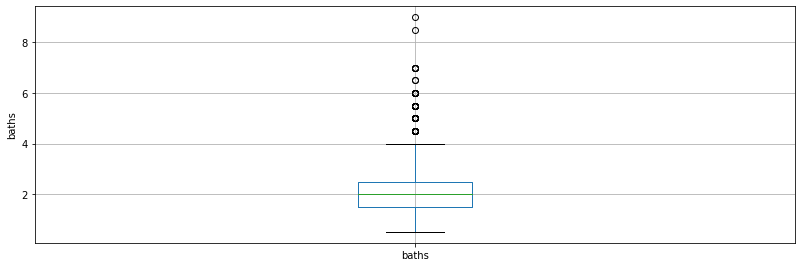

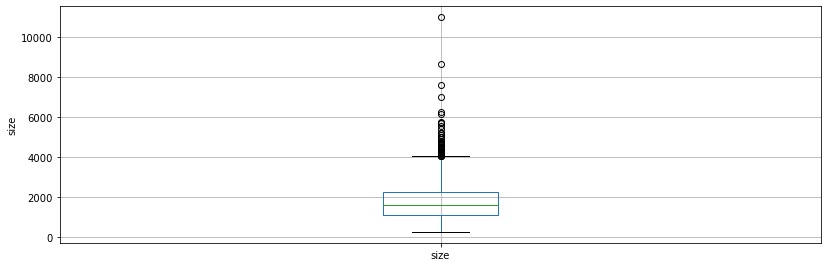

In [726]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=df.boxplot(column='price')
fig.set_ylabel('price')

plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=df.boxplot(column='beds')
fig.set_ylabel('beds')

plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=df.boxplot(column='baths')
fig.set_ylabel('baths')

plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=df.boxplot(column='size')
fig.set_ylabel('size')

##  TO CHECK SKEWNESS

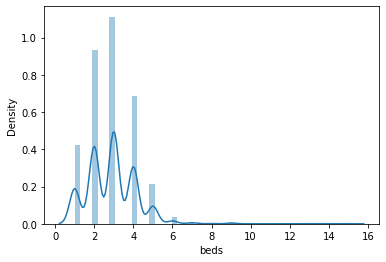

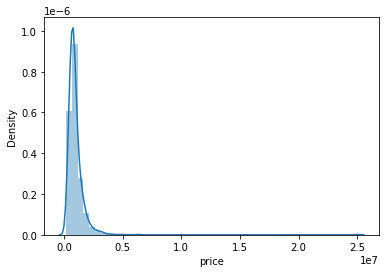

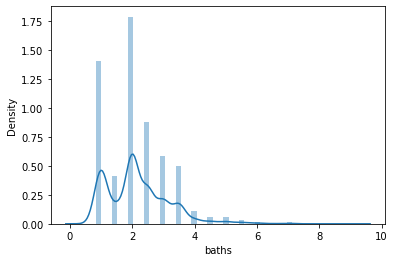

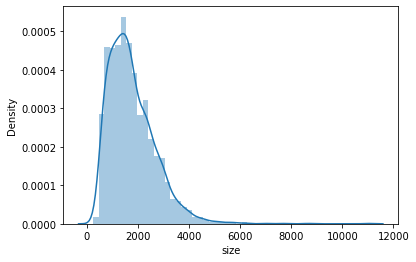

In [727]:
plt.figure()
sb.distplot(df['beds'])
plt.show()

plt.figure()
sb.distplot(df['price'])
plt.show()

plt.figure()
sb.distplot(df['baths'])
plt.show()

plt.figure()
sb.distplot(df['size'])
plt.show()

array([[<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'lot_size'}>,
        <AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'lot_size_sqft'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

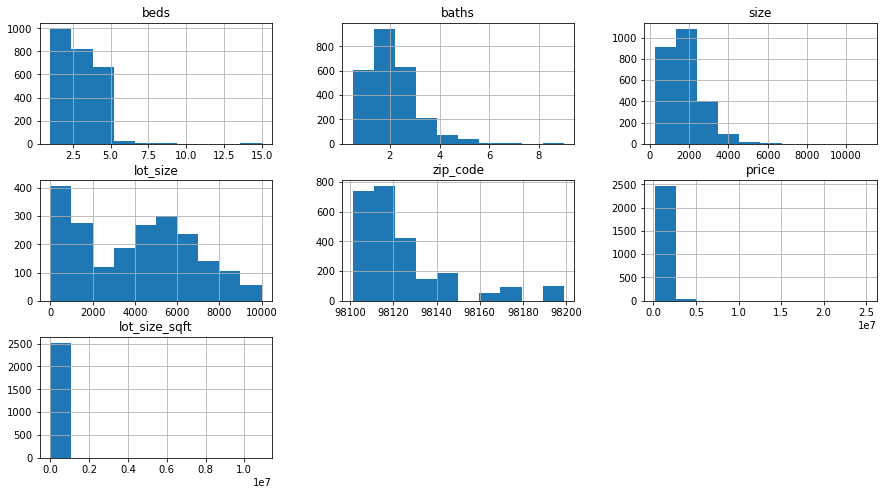

In [728]:
df.hist(figsize=(15,8))

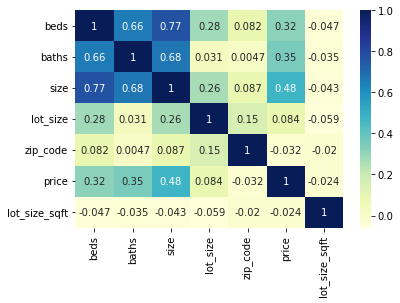

In [729]:
#plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)      #using seaborn
  
# displaying heatmap
plt.show()

In [730]:
df.corr()

,beds,baths,size,lot_size,zip_code,price,lot_size_sqft
beds,1.000000,0.660099,0.770757,0.279501,0.081527,0.316855,-0.047101
baths,0.660099,1.000000,0.675225,0.031343,0.004700,0.349062,-0.035246
size,0.770757,0.675225,1.000000,0.263893,0.087106,0.476061,-0.043275
lot_size,0.279501,0.031343,0.263893,1.000000,0.148520,0.084253,-0.059225
zip_code,0.081527,0.004700,0.087106,0.148520,1.000000,-0.031812,-0.020444
price,0.316855,0.349062,0.476061,0.084253,-0.031812,1.000000,-0.023644
lot_size_sqft,-0.047101,-0.035246,-0.043275,-0.059225,-0.020444,-0.023644,1.000000


## Handling null value using IQR 

# 1

In [731]:
percentile25=df['price'].quantile(0.25)
percentile75=df['price'].quantile(0.75)

In [732]:
iqr=percentile75-percentile25

In [733]:
upper_limit= percentile25+1.5*iqr
lower_limit=percentile75-1.5*iqr

In [734]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 1370000.0
lower_limit 350000.0


# Trimming

In [735]:
new_df=df[df['price']<upper_limit]

Text(0, 0.5, 'price')

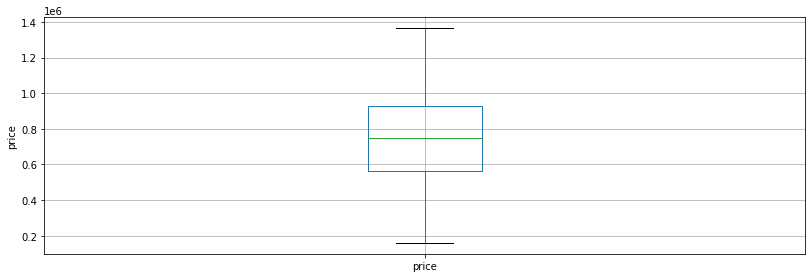

In [736]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=new_df.boxplot(column='price')
fig.set_ylabel('price')


## 2

In [737]:
percentile25=df['size'].quantile(0.25)
percentile75=df['size'].quantile(0.75)

In [738]:
iqr2=percentile75-percentile25

In [739]:
upper_limit= percentile25+1.5*iqr2
lower_limit=percentile75-1.5*iqr2

In [740]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 2862.0
lower_limit 494.0


In [741]:
new_df=df[df['size']<upper_limit]

Text(0, 0.5, 'size')

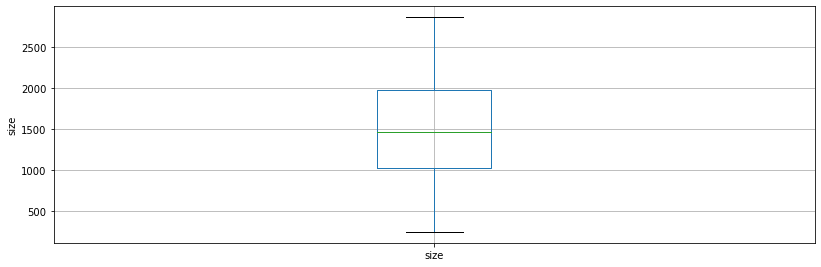

In [742]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=new_df.boxplot(column='size')
fig.set_ylabel('size')


# 3

In [743]:
percentile25=df['baths'].quantile(0.25)
percentile75=df['baths'].quantile(0.75)

In [744]:
iqr3=percentile75-percentile25

In [745]:
upper_limit= percentile25+1.5*iqr3
lower_limit=percentile75-1.5*iqr3

In [746]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 3.0
lower_limit 1.0


In [747]:
new_df=df[df['baths']<upper_limit]

Text(0, 0.5, 'baths')

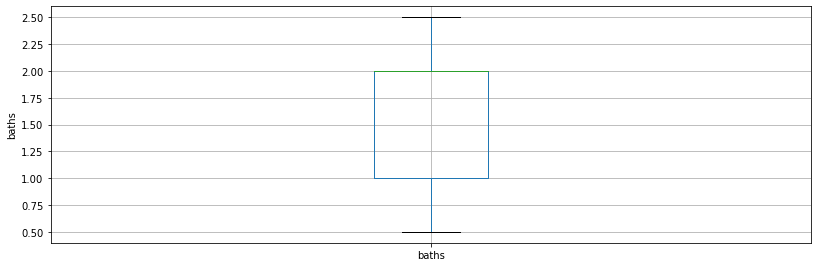

In [748]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=new_df.boxplot(column='baths')
fig.set_ylabel('baths')

# 4

In [749]:
percentile25=df['beds'].quantile(0.25)
percentile75=df['beds'].quantile(0.75)

In [750]:
iqr4=percentile75-percentile25

In [751]:
upper_limit= percentile25+1.5*iqr4
lower_limit=percentile75-1.5*iqr4

In [752]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 5.0
lower_limit 1.0


In [753]:
new_df=df[df['beds']<upper_limit]

Text(0, 0.5, 'beds')

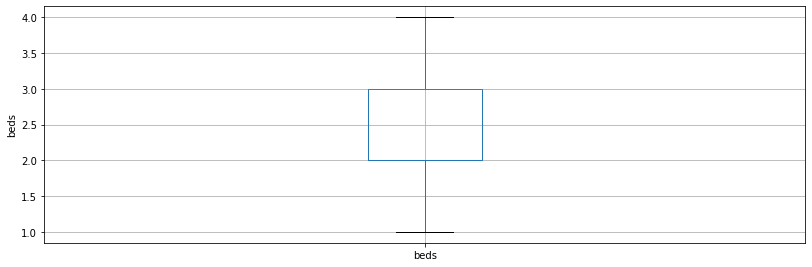

In [754]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
fig=new_df.boxplot(column='beds')
fig.set_ylabel('beds')


In [755]:
new_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lot_size_sqft,zip_cat
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,6000.0,98144
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,13503.6,98106
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,3783.0,98107
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,5175.0,98199
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,5000.0,98102


In [756]:
new_df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          424
lot_size_units    424
zip_code            0
price               0
lot_size_sqft       0
zip_cat             0
dtype: int64

## Handle skewness using np.log function

In [757]:
new_df['price']=np.log(new_df['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

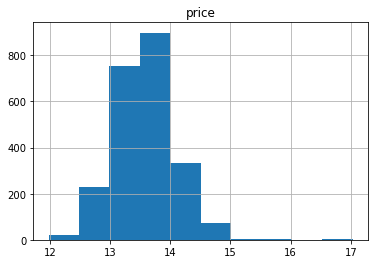

In [758]:
new_df.hist(['price'])

In [759]:
new_df['lot_size_sqft']=np.log(new_df['lot_size_sqft'])

array([[<AxesSubplot:title={'center':'lot_size_sqft'}>]], dtype=object)

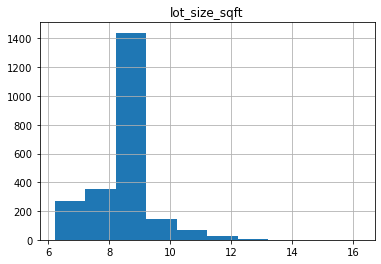

In [760]:
new_df.hist(['lot_size_sqft'])

In [761]:
new_df['size']=np.log(new_df['size'])

array([[<AxesSubplot:title={'center':'size'}>]], dtype=object)

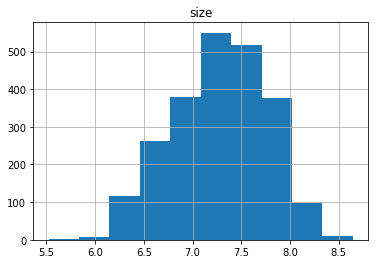

In [762]:
new_df.hist(['size'])

In [763]:
new_df['baths']=np.log(new_df['baths'])

array([[<AxesSubplot:title={'center':'baths'}>]], dtype=object)

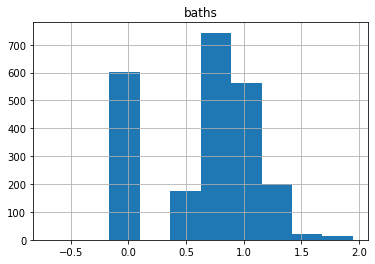

In [764]:
new_df.hist(['baths'])

In [765]:
new_df['beds']=np.log(new_df['beds'])

array([[<AxesSubplot:title={'center':'beds'}>]], dtype=object)

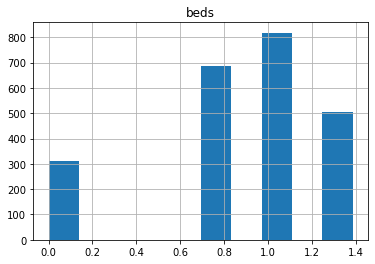

In [766]:
new_df.hist(['beds'])

In [767]:
new_df['zip_code']=np.log(new_df['zip_code'])

array([[<AxesSubplot:title={'center':'zip_code'}>]], dtype=object)

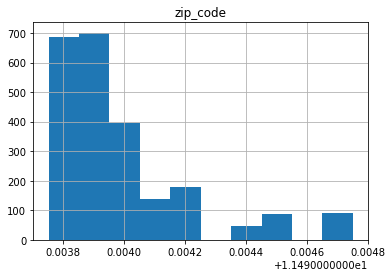

In [768]:
new_df.hist(['zip_code'])

In [769]:
new_df['price'].sort_values(ascending= False).head()   #checking for the two outliers.

1359    17.034386
1700    17.034386
325     15.648092
637     15.648092
61      15.519349
Name: price, dtype: float64

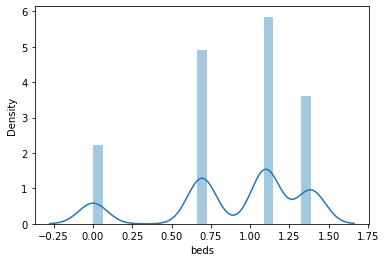

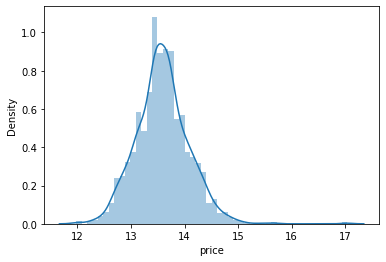

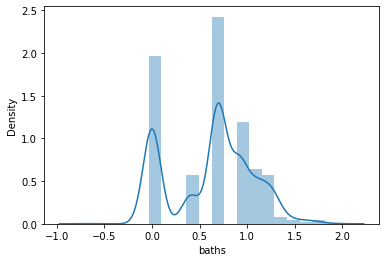

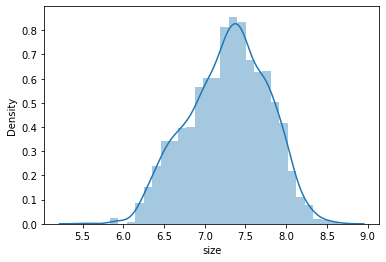

In [770]:
plt.figure()
sb.distplot(new_df['beds'])
plt.show()

plt.figure()
sb.distplot(new_df['price'])
plt.show()

plt.figure()
sb.distplot(new_df['baths'])
plt.show()

plt.figure()
sb.distplot(new_df['size'])
plt.show()


In [771]:
from sklearn.preprocessing import LabelEncoder

In [772]:
label_encoder=LabelEncoder()

In [773]:
new_df['lot_size_units']=label_encoder.fit_transform(new_df['lot_size_units'])

In [774]:
new_df['lot_size_units'].isnull().sum()

0

In [775]:
new_df.dtypes

beds               float64
baths              float64
size               float64
size_units          object
lot_size           float64
lot_size_units       int32
zip_code           float64
price              float64
lot_size_sqft      float64
zip_cat           category
dtype: object

In [776]:
X=new_df.drop(['size_units','price','lot_size','zip_code'],axis=1)
y=new_df['price']

In [777]:
X

,beds,baths,size,lot_size_units,lot_size_sqft,zip_cat
0,1.098612,0.916291,7.859413,1,8.699515,98144
1,1.386294,0.693147,7.714231,0,9.510712,98106
2,1.386294,1.098612,7.620705,1,8.238273,98107
3,1.386294,1.098612,8.242756,1,8.551595,98199
4,0.693147,0.693147,6.948897,2,8.517193,98102
...,...,...,...,...,...,...
497,0.693147,0.916291,7.130899,1,6.907755,98107
499,0.693147,0.405465,6.992096,1,7.499423,98117
501,1.098612,0.916291,7.237059,1,7.358831,98126
502,1.098612,0.916291,7.989560,0,9.926872,98118


In [778]:
y

0      13.586097
1      13.726679
2      13.764217
3      14.483340
4      13.764217
         ...    
497    13.554146
499    13.350295
501    13.262125
502    14.948524
504    13.704579
Name: price, Length: 2321, dtype: float64

In [779]:
from sklearn.model_selection import train_test_split

In [780]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [781]:
X_train

,beds,baths,size,lot_size_units,lot_size_sqft,zip_cat
1009,1.098612,0.693147,7.426549,1,8.517193,98199
1139,0.693147,0.000000,6.756932,1,8.476371,98108
370,1.098612,0.693147,7.787382,1,8.507143,98199
600,1.098612,0.693147,7.630461,1,8.035926,98118
1484,0.693147,0.000000,6.845880,1,8.101678,98118
...,...,...,...,...,...,...
1116,1.098612,0.693147,7.261927,1,6.591674,98117
1873,1.386294,0.693147,7.951559,1,8.656955,98126
829,1.098612,0.000000,7.138867,0,9.542460,98168
902,0.693147,0.693147,7.106606,1,6.626718,98118


In [782]:
y_train

1009    13.899392
1139    13.244581
370     13.895246
600     13.458836
1484    13.217674
          ...    
1116    13.541072
1873    13.976779
829     12.994530
902     13.304685
1792    13.997832
Name: price, Length: 1624, dtype: float64

In [783]:
from sklearn.linear_model import LinearRegression

In [784]:
model=LinearRegression()

In [785]:
model.fit(X_train,y_train)
#model.score(X_test,y_test)

LinearRegression()

In [786]:
print(model.coef_)

[-0.05096687  0.18005001  0.69387634 -0.03270412 -0.021644   -0.00258413]


In [787]:
pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

,Coeff
beds,-0.050967
baths,0.180050
size,0.693876
lot_size_units,-0.032704
lot_size_sqft,-0.021644
zip_cat,-0.002584


In [788]:
prediction=model.predict(X_test)

In [789]:
from sklearn import metrics

In [790]:
metrics.mean_absolute_error(y_test,prediction)

0.2177916662116626

In [791]:
metrics.mean_squared_error(y_test,prediction)

0.08668088251372119

In [792]:
model.intercept_

262.2484898552883

In [793]:
metrics.mean_absolute_percentage_error(y_test,prediction)

0.01603249850143043

In [806]:
metrics.r2_score(y_test,prediction)

0.6249393582605693

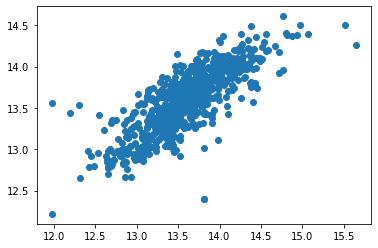

In [795]:
plt.scatter(y_test,prediction)

Text(0, 0.5, 'Prediction')

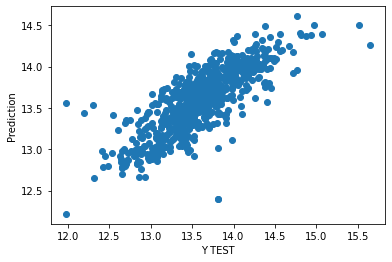

In [796]:
plt.scatter(y_test,prediction)
plt.xlabel("Y TEST")
plt.ylabel("Prediction")

In [797]:
# sb.lmplot(x='price',y='zip_cat',data=new_df)

In [798]:
new_df.var()

beds              1.866872e-01
baths             1.918141e-01
size              2.316530e-01
lot_size          7.400441e+06
lot_size_units    2.863800e-01
zip_code          5.540853e-08
price             2.429928e-01
lot_size_sqft     9.084420e-01
dtype: float64

In [807]:
from sklearn.ensemble import RandomForestRegressor

In [808]:
rdf = RandomForestRegressor(n_estimators=10,random_state=70)
rdf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=70)

In [809]:
rdf_pred = rdf.predict(X_test)

In [810]:
metrics.mean_absolute_error(y_test,rdf_pred)

0.1934611164092463

In [811]:
metrics.r2_score(y_test,rdf_pred)

0.6778692278467734